In [1]:
!nvidia-smi

Tue Jul  8 11:08:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sLuPuKteeAfdptNqeD45")
project = rf.workspace("syrine-gdlok").project("crabsex-detection")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.162 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/crabsex-detection-2/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

/content


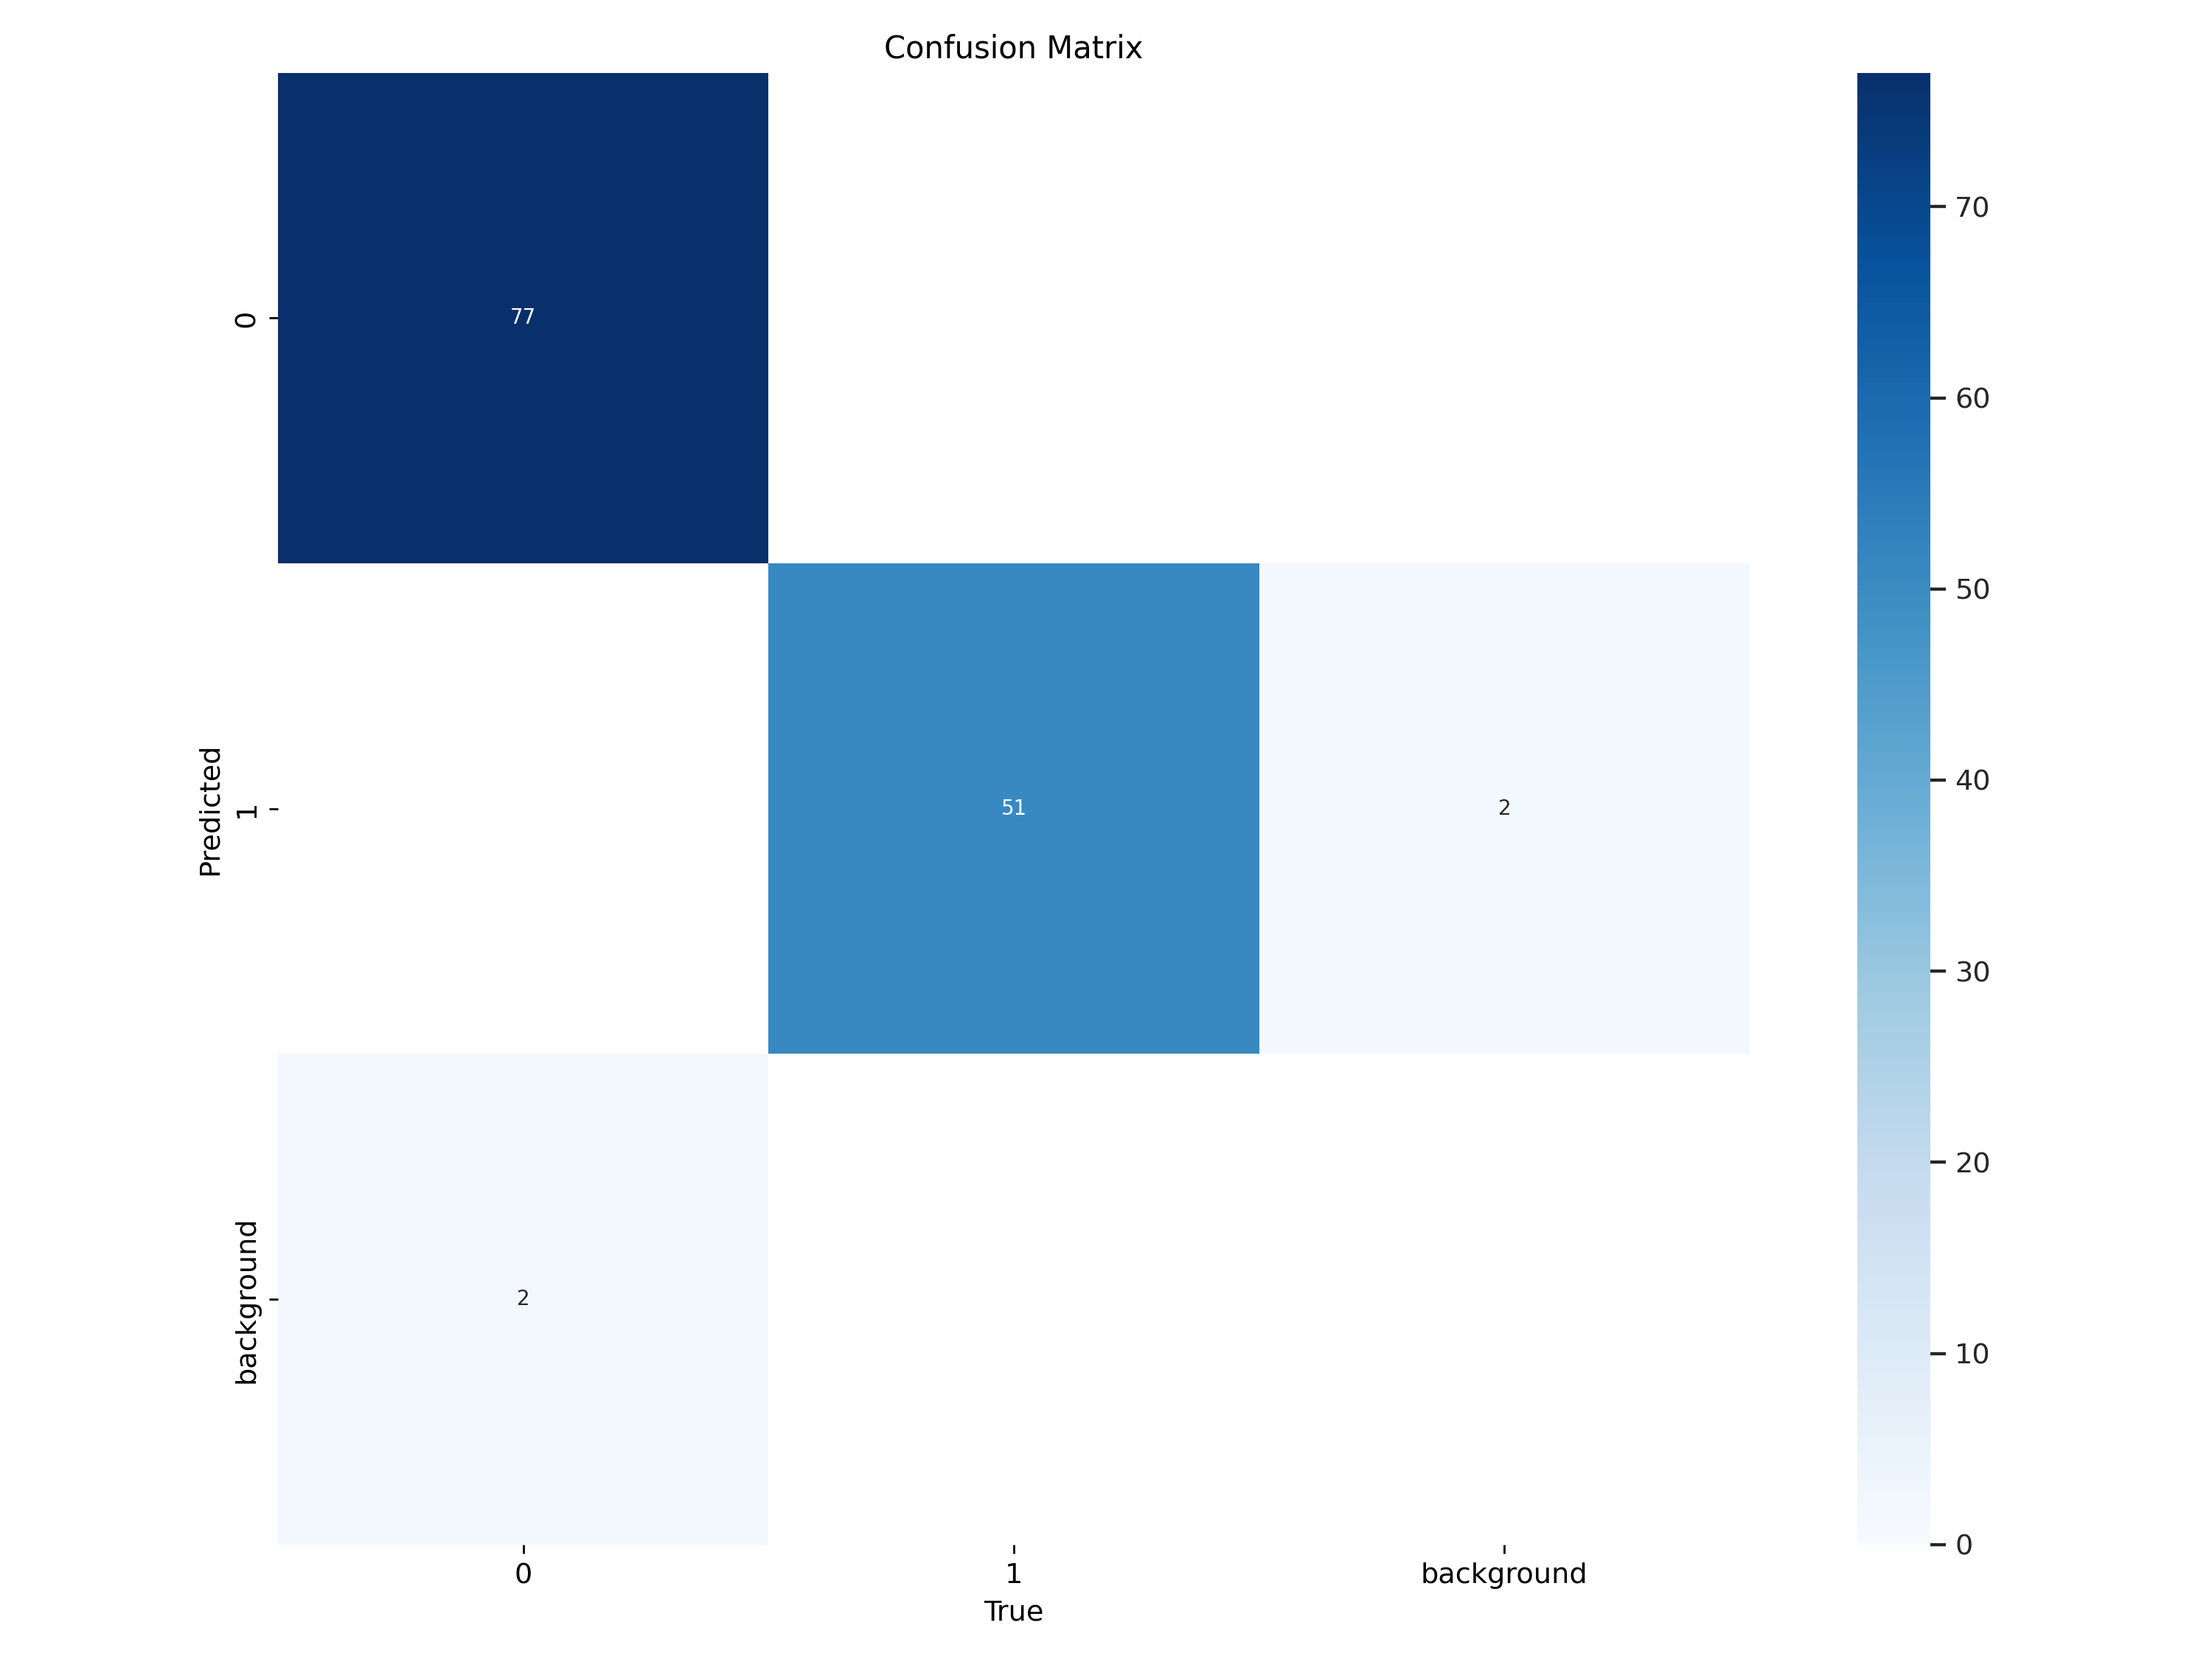

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


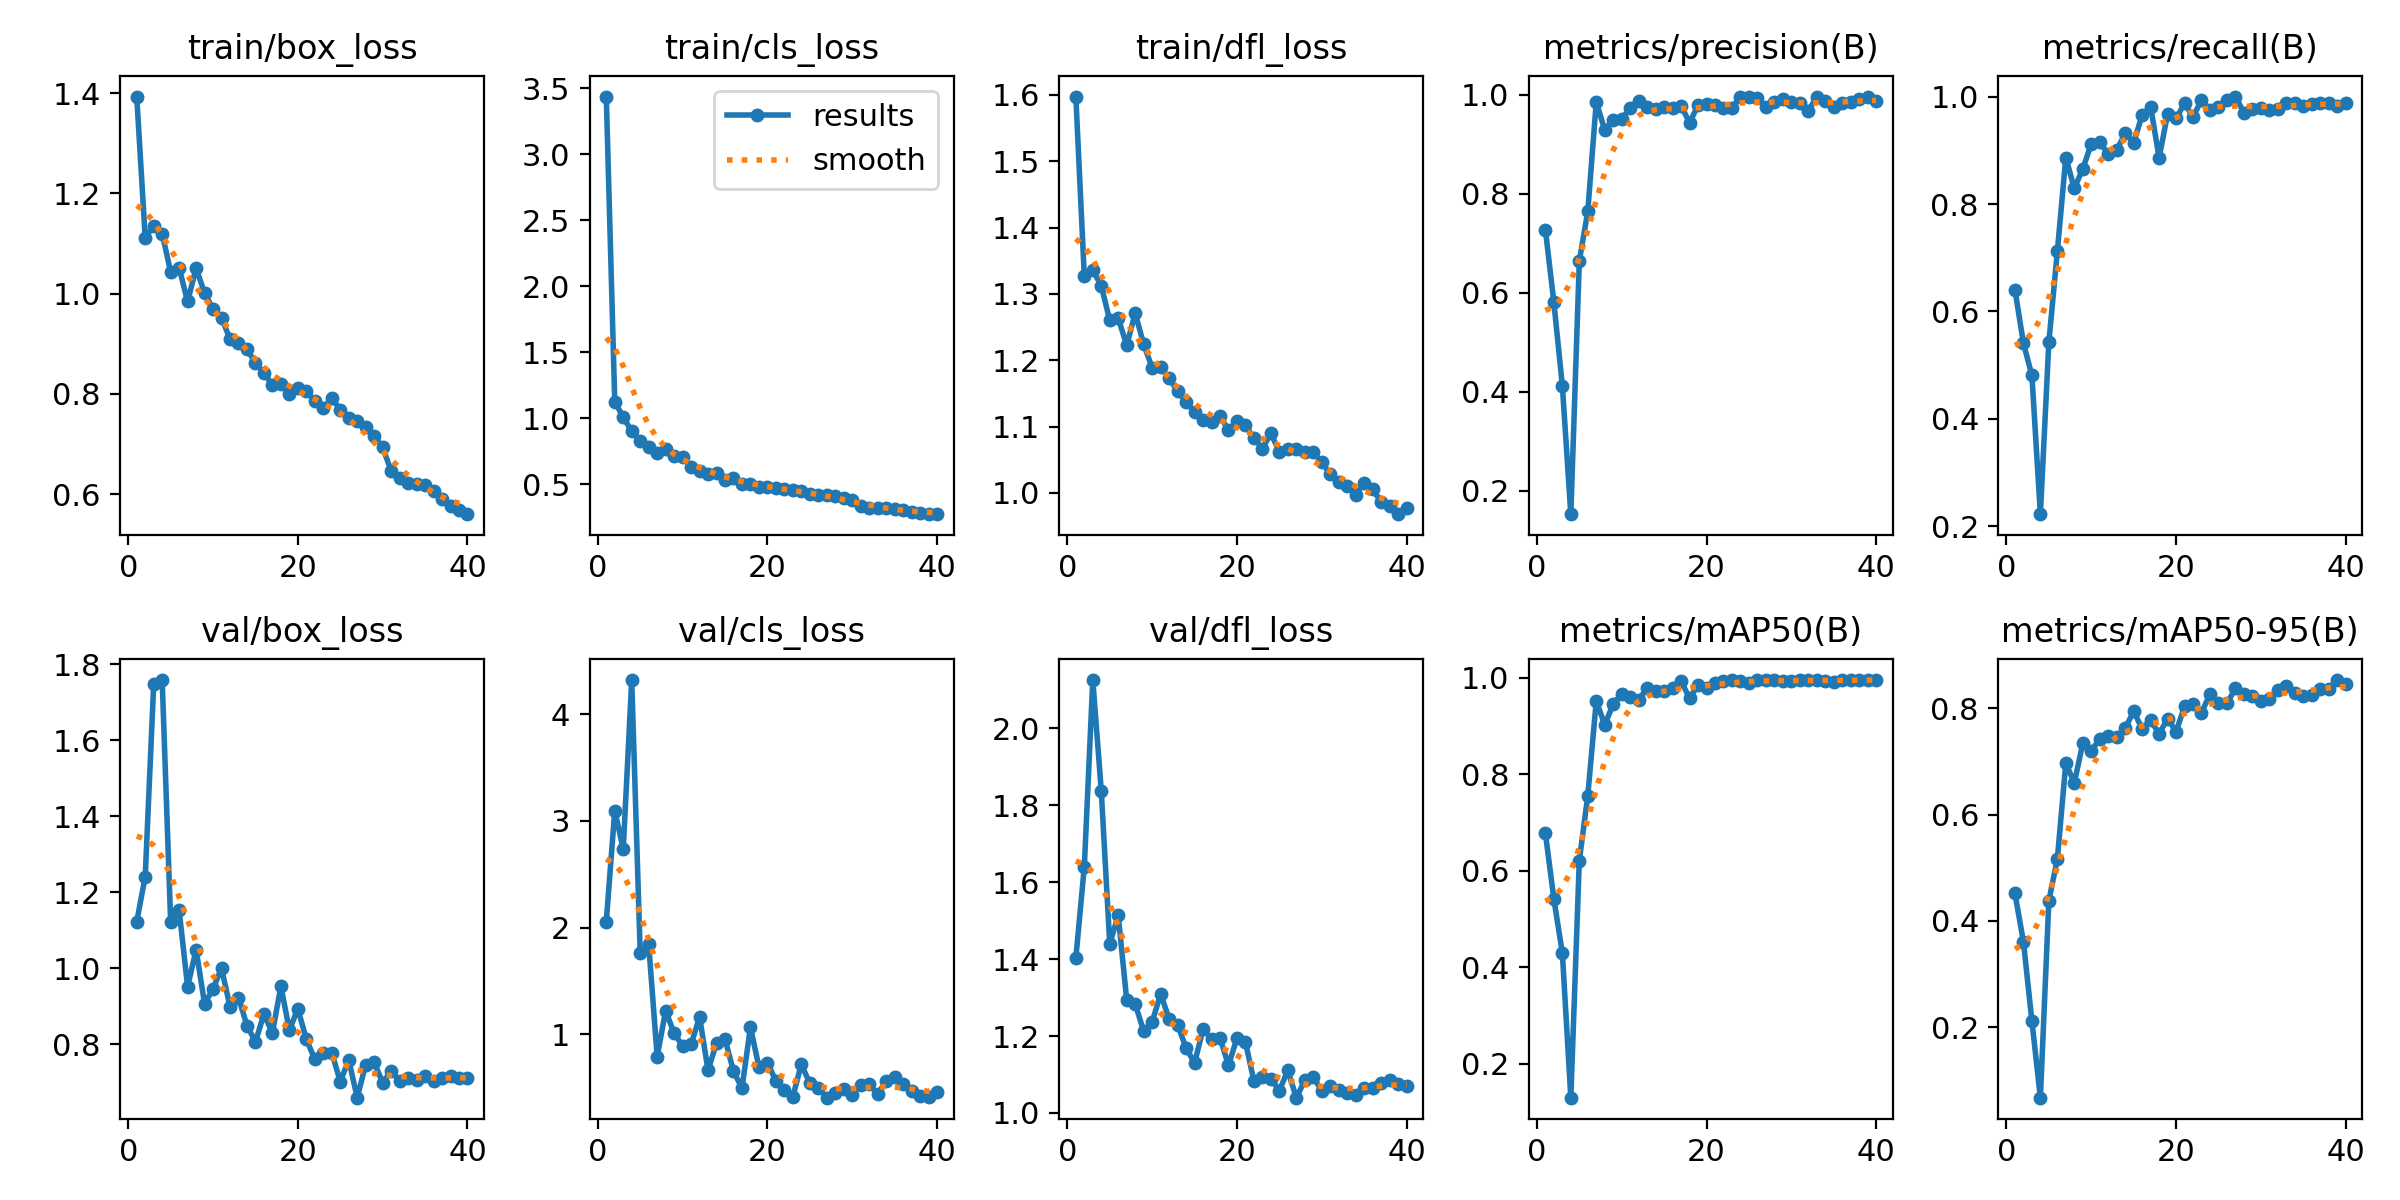

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


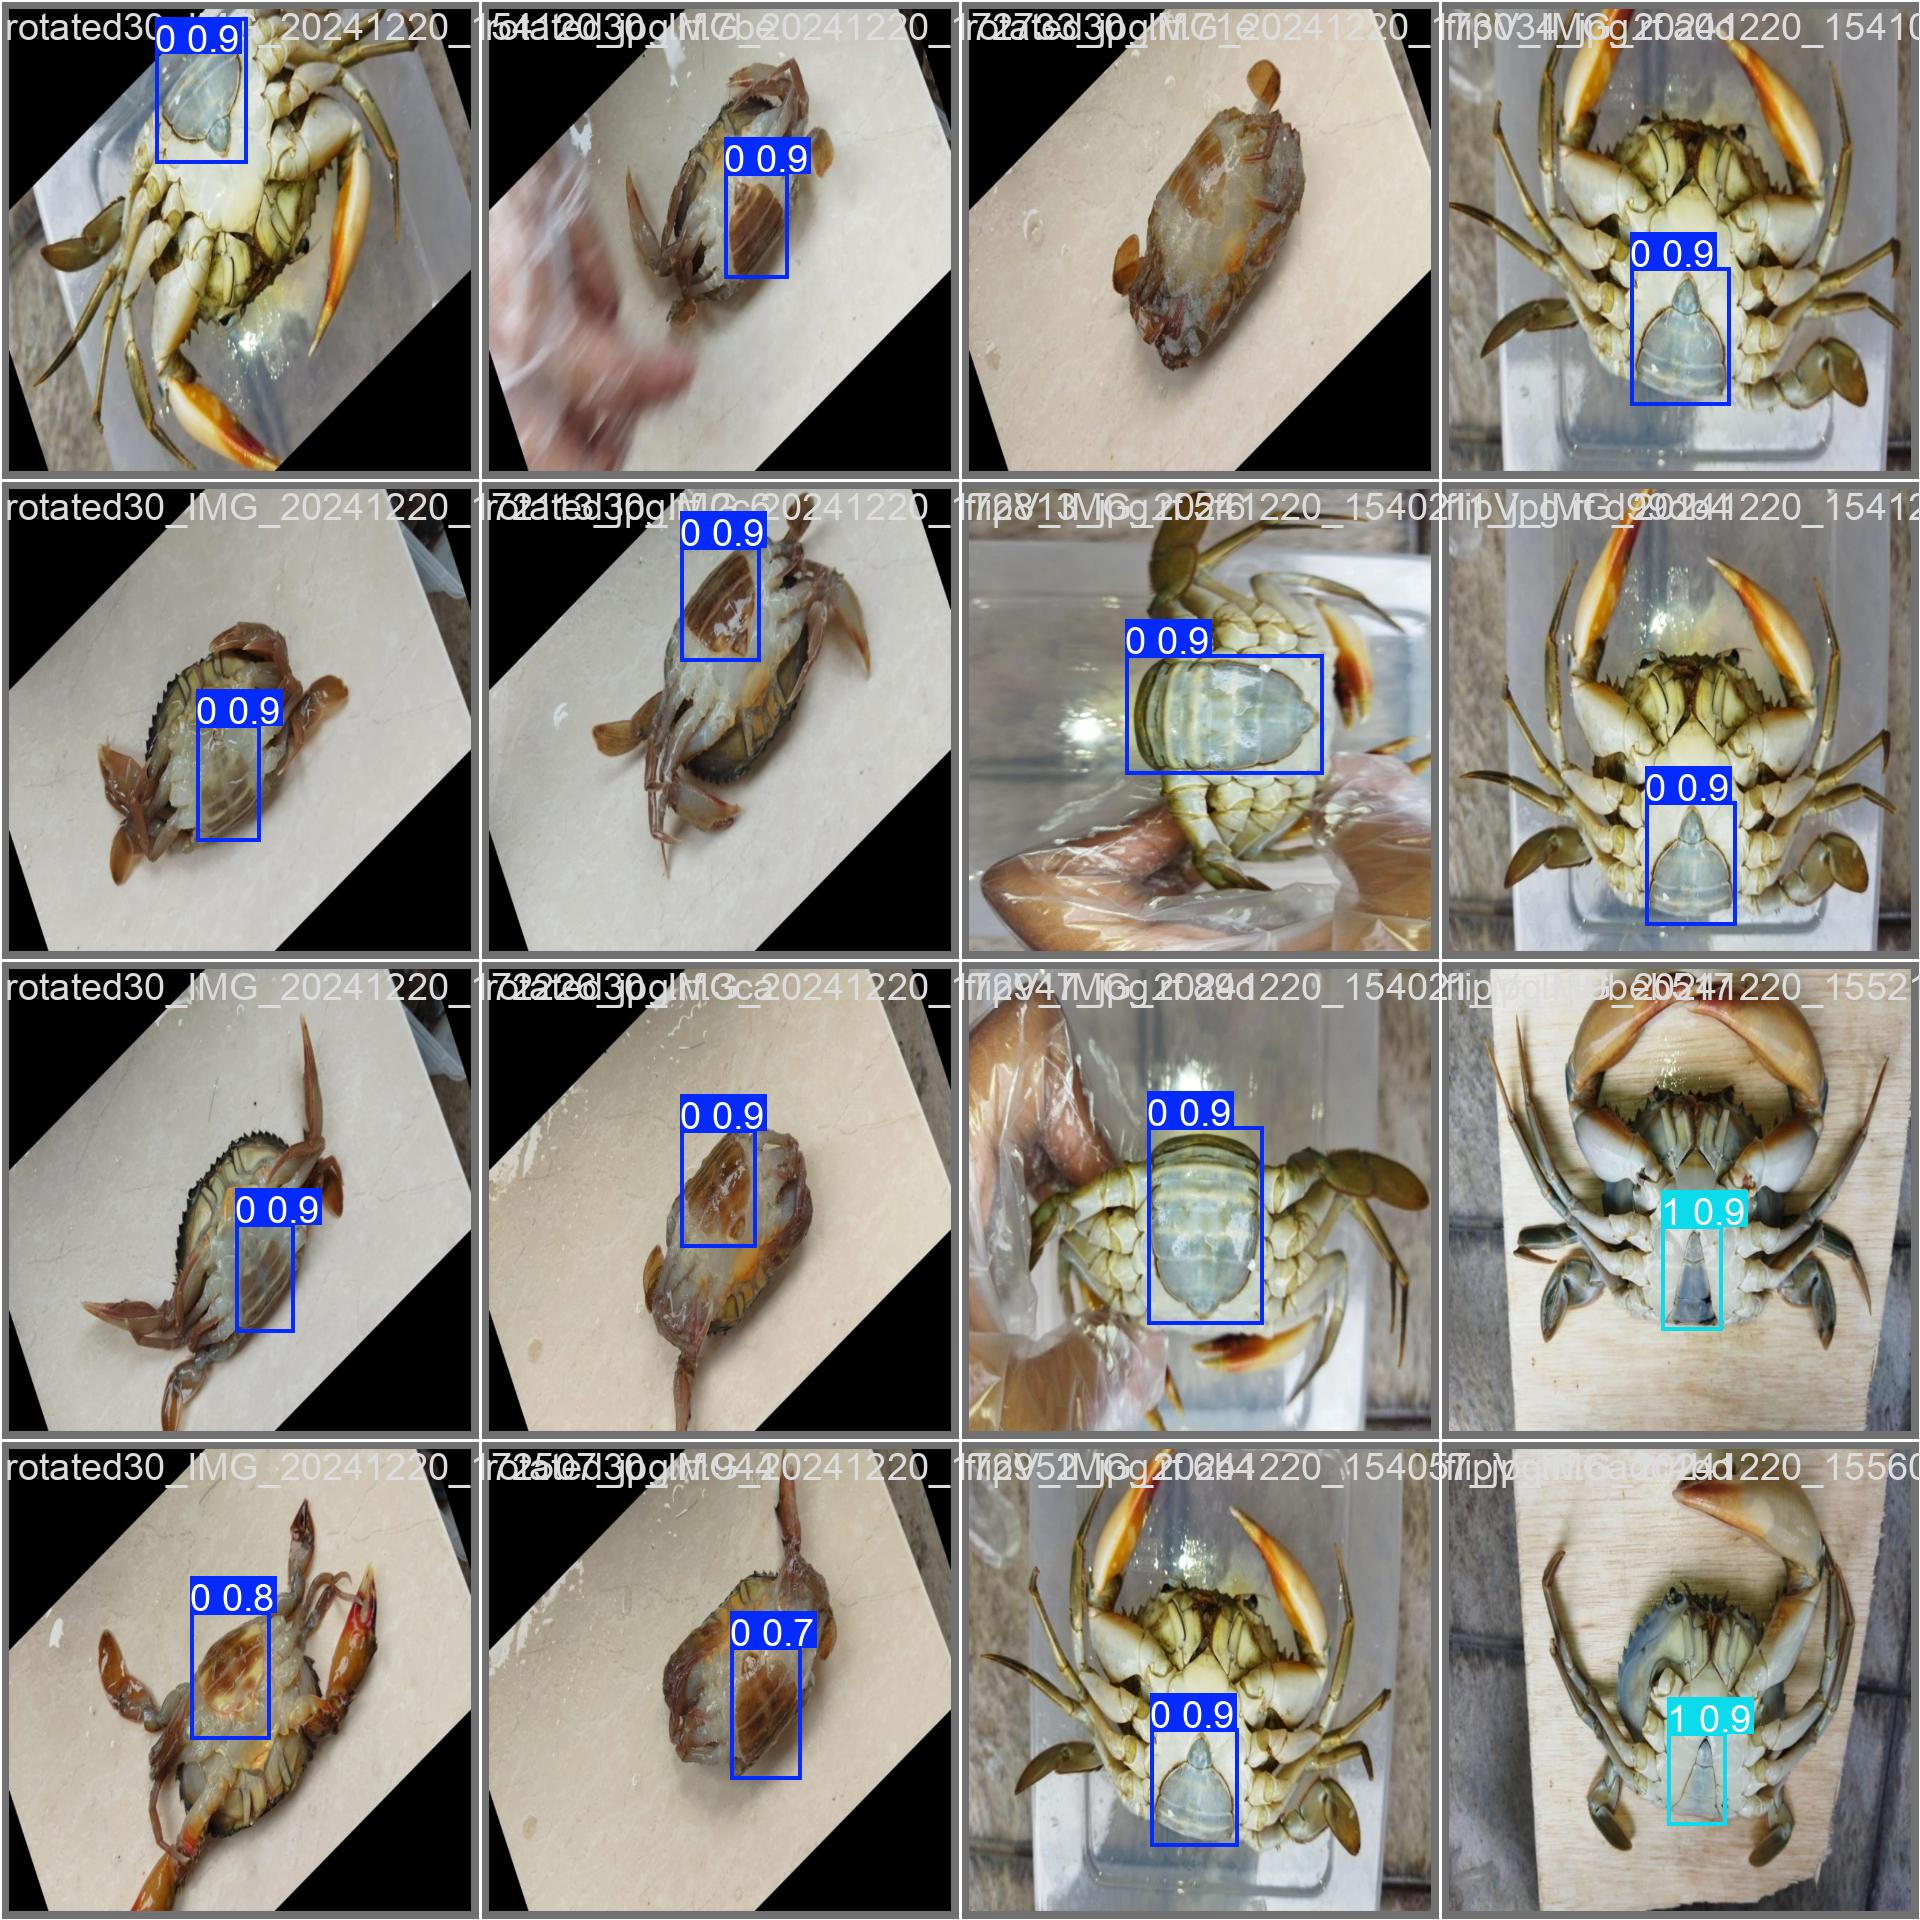

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/crabsex-detection-2/valid/labels.cache... 130 images, 0 backgrounds, 0 corrupt: 100% 130/130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:03<00:00,  2.40it/s]
                   all        130        130      0.995      0.983      0.995      0.852
                     0         79         79          1      0.967      0.995      0.881
                     1         51         51       0.99          1      0.995      0.823
Speed: 3.6ms preprocess, 14.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/100 /content/datasets/crabsex-detection-2/test/images/contrast_IMG_20241220_162602_jpg.rf.9b5c3a58f07d89503c545c98ea944cd2.jpg: 800x800 1 1, 22.8ms
image 2/100 /content/datasets/crabsex-detection-2/test/images/contrast_IMG_20241220_162709_jpg.rf.01627a041b64337f3b741f75af826842.jpg: 800x800 1 1, 22.9ms
image 3/100 /content/datasets/crabsex-detection-2/test/images/contrast_IMG_20241220_165510_jpg.rf.c1308390b2681cb74452dafd55bcd7d0.jpg: 800x800 1 1, 22.8ms
image 4/100 /content/datasets/crabsex-detection-2/test/images/contrast_IMG_20241220_170217_jpg.rf.57e2ccf0f1ffb9ab96dcf7c7a7292aee.jpg: 800x800 1 1, 22.8ms
image 5/100 /content/datasets/crabsex-detection-2/test/images/contrast_IMG_20241220_170223_jpg.rf.99549634920cf4e42cd0f2a0edfd8a17.jpg: 800x800 1 1, 22.8ms
image 6/100 /content/datasets/crabsex-d